<a href="https://colab.research.google.com/github/DMT130/DerPy/blob/master/Lithology_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loged.csv to loged (2).csv


In [ ]:
import io
log = pd.read_csv(io.StringIO(uploaded['loged (2).csv'].decode('utf-8')))

In [ ]:
log.head()

,Unnamed: 0,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
0,0,13.0,7.6,0.16,2.60,60.16,74.98
1,1,13.0,7.6,0.15,2.61,55.74,75.58
2,2,13.0,7.6,0.15,2.64,52.77,76.91
3,3,13.0,7.6,0.14,2.62,55.47,77.87
4,4,13.0,7.6,0.14,2.61,56.58,78.36


In [ ]:
log.columns

In [ ]:
log.drop('Unnamed: 0', axis = 1)

,Lithology,CALI.in,NPHI.m3/m3,RHOB.g/cm3,GR.gAPI,DTC.us/ft
0,13.0,7.60,0.16,2.60,60.16,74.98
1,13.0,7.60,0.15,2.61,55.74,75.58
2,13.0,7.60,0.15,2.64,52.77,76.91
3,13.0,7.60,0.14,2.62,55.47,77.87
4,13.0,7.60,0.14,2.61,56.58,78.36
...,...,...,...,...,...,...
369407,5.0,8.10,0.18,2.60,59.61,84.05
369408,5.0,8.09,0.19,2.60,58.06,84.14
369409,5.0,8.09,0.19,2.60,55.48,84.05
369410,5.0,8.08,0.19,2.60,58.44,84.14


In [ ]:
X=log[['CALI.in', 'NPHI.m3/m3', 'RHOB.g/cm3', 'GR.gAPI','DTC.us/ft']]
y=log['Lithology']

In [ ]:
y.replace(31, 1, inplace=True)
y.replace(2, 1, inplace=True)
y.replace(3, 1, inplace=True)
y.replace(35, 1, inplace=True)
y.replace(36, 4, inplace=True)
y.replace(6, 5, inplace=True)
y.replace(8, 7, inplace=True)
y.replace(16, 10, inplace=True)
y.replace(9, 11, inplace=True)
y.replace(31, 11, inplace=True)
y.replace(12, 14, inplace=True)
y.replace(13, 14, inplace=True)
y.replace(23, 20, inplace=True)
y.replace(24, 20, inplace=True)
y.replace(19, 20, inplace=True)
y.replace(28, 20, inplace=True)
y.replace(29, 20, inplace=True)
y.replace(30, 1, inplace=True)
y.replace(27, 21, inplace=True)
y.replace(32, 21, inplace=True)
y.replace(33, 21, inplace=True)
y.replace(34, 21, inplace=True)

In [ ]:
y.nunique()

14

In [ ]:
y.unique()

array([14.,  5.,  1.,  7.,  4., 10., 20., 18., 11., 26., 22., 21., 17.,
       15.])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
from keras.utils import np_utils

# Now we one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_test.shape

(73883, 27)

In [ ]:
tf.reset_default_graph()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(16,input_dim= 5, activation = 'elu'))
model.add(Dense(32,activation='elu'))
model.add(Dense(64, activation='elu'))
model.add(Dense(128, activation='elu'))
model.add(Dropout(0.5))
model.add(Dense(27,activation='softmax'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                96        
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 27)                3483      
Total params: 14,555
Trainable params: 14,555
Non-trainable params: 0
__________________________________________________

In [ ]:
from keras.optimizers import SGD
model.compile(optimizer ="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=10, epochs = 100, validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

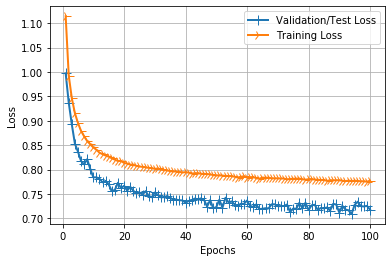

In [ ]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

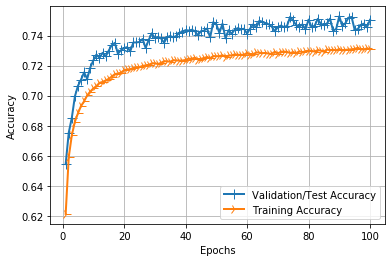

In [ ]:
history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Saving Trained Models into Google Drive
### 0. Install PyDrive library into Google Colab notebook.

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

### 1. Authenticate and create the PyDrive client

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



### 2. Save Model or weights on google drive and create on Colab directory in Google Drive

In [ ]:
model.save('AILitho.h5')
model_file = drive.CreateFile({'title' : 'AILitho.h5'})                       
model_file.SetContentFile('AILitho.h5')                       
model_file.Upload()

### 3. Download the model to google drive

In [ ]:
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF'})

# Loading models from Google Drive into Colab

In [ ]:
file_obj = drive.CreateFile({'id': '1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF'})                       
file_obj.GetContentFile('keras.h5')

In [ ]:
model

In [ ]:
file_obj

GoogleDriveFile({'id': '1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF', 'kind': 'drive#file', 'etag': '"x2jdlkqYTB8kzPmV7jH2KPtlR68/MTU4MDIyMjUwNzkyNw"', 'selfLink': 'https://www.googleapis.com/drive/v2/files/1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF', 'webContentLink': 'https://drive.google.com/uc?id=1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF&export=download', 'alternateLink': 'https://drive.google.com/file/d/1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF/view?usp=drivesdk', 'embedLink': 'https://drive.google.com/file/d/1xD7EjTJb-6ISWD1zydIK0n8ODmZiMcRF/preview?usp=drivesdk', 'iconLink': 'https://drive-thirdparty.googleusercontent.com/16/type/application/octet-stream', 'title': 'AILitho.h5', 'mimeType': 'application/octet-stream', 'labels': {'starred': False, 'hidden': False, 'trashed': False, 'restricted': False, 'viewed': True}, 'copyRequiresWriterPermission': False, 'createdDate': '2020-01-28T14:41:47.927Z', 'modifiedDate': '2020-01-28T14:41:47.927Z', 'modifiedByMeDate': '2020-01-28T14:41:47.927Z', 'lastViewedByMeDate': '2

# **Testing With External Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving testlog.csv to testlog.csv


In [ ]:
testlog = pd.read_csv(io.StringIO(uploaded['testlog.csv'].decode('utf-8')))

In [ ]:
testlog.head()

,DEPTH,LITHO,CALI,NPHI,RHOB,GR,DTC
0,196.551025,-999.25,23.875,-999.25,1.596,30.577433,187.744995
1,196.703400,-999.25,23.875,-999.25,1.602,29.735014,187.748703
2,196.855804,-999.25,23.875,-999.25,1.615,31.966314,187.741409
3,197.008194,-999.25,23.875,-999.25,1.635,31.250937,187.744995
4,197.160599,-999.25,23.875,-999.25,1.655,30.875450,187.748703


In [ ]:
testlog.replace(-999.25, np.nan, inplace = True)
testlog.dropna(inplace=True)

y = testlog['LITHO']
X = testlog[['CALI', 'NPHI', 'RHOB', 'GR', 'DTC']]

y.replace(31, 1, inplace=True)
y.replace(2, 1, inplace=True)
y.replace(3, 1, inplace=True)
y.replace(35, 1, inplace=True)
y.replace(36, 4, inplace=True)
y.replace(6, 5, inplace=True)
y.replace(8, 7, inplace=True)
y.replace(16, 10, inplace=True)
y.replace(9, 11, inplace=True)
y.replace(31, 11, inplace=True)
y.replace(12, 14, inplace=True)
y.replace(13, 14, inplace=True)
y.replace(23, 20, inplace=True)
y.replace(24, 20, inplace=True)
y.replace(19, 20, inplace=True)
y.replace(28, 20, inplace=True)
y.replace(29, 20, inplace=True)
y.replace(30, 1, inplace=True)
y.replace(27, 21, inplace=True)
y.replace(32, 21, inplace=True)
y.replace(33, 21, inplace=True)
y.replace(34, 21, inplace=True)

In [ ]:
X = np.array(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
PredLitho = model.predict(X)

In [ ]:
PredLitho

array([[9.2155693e-11, 3.6313880e-02, 9.2165185e-11, ..., 9.2146207e-11,
        9.2248195e-11, 3.0213621e-05],
       [9.8295455e-11, 3.5878848e-02, 9.8305961e-11, ..., 9.8285713e-11,
        9.8396000e-11, 5.9682250e-05],
       [7.6755768e-11, 1.4454012e-02, 7.6764553e-11, ..., 7.6747421e-11,
        7.6840138e-11, 1.1107060e-04],
       ...,
       [2.3929048e-11, 1.2505589e-02, 2.3932425e-11, ..., 2.3926219e-11,
        2.3957362e-11, 1.9517904e-05],
       [2.5368155e-11, 3.3873666e-02, 2.5371155e-11, ..., 2.5365493e-11,
        2.5393231e-11, 2.9211203e-04],
       [1.5633054e-11, 2.0011628e-02, 1.5634842e-11, ..., 1.5631324e-11,
        1.5648446e-11, 1.5080624e-04]], dtype=float32)

In [ ]:
PredictedLitho = model.predict_classes(X)

In [ ]:
PredictedLitho

array([5, 5, 5, ..., 7, 5, 5])

In [ ]:
Lithoclass = pd.Series(PredictedLitho)

In [ ]:
y[:10]

13076    5.0
13077    5.0
13078    4.0
13079    4.0
13080    4.0
13081    4.0
13082    4.0
13083    4.0
13084    4.0
13085    4.0
Name: LITHO, dtype: float64

In [ ]:
Lithoclass[:10]

0    5
1    5
2    5
3    5
4    5
5    5
6    5
7    5
8    5
9    5
dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y,Lithoclass))

              precision    recall  f1-score   support

         1.0       0.49      0.44      0.47      1762
         4.0       0.08      0.07      0.08      1061
         5.0       0.46      0.67      0.55      4527
         7.0       0.13      0.84      0.23       214
        10.0       0.00      0.00      0.00        39
        11.0       0.00      0.00      0.00      1191
        14.0       0.68      0.32      0.43      3234
        15.0       0.00      0.00      0.00         0
        17.0       0.00      0.00      0.00         0
        18.0       0.68      0.33      0.45       156
        20.0       0.00      0.00      0.00         0
        26.0       0.00      0.00      0.00         0

    accuracy                           0.42     12184
   macro avg       0.21      0.22      0.18     12184
weighted avg       0.44      0.42      0.40     12184



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Lithoclass.unique()

array([ 5, 26, 14, 20,  1, 10,  4, 15,  7, 17, 18])

In [ ]:
testlog['AIpred']=PredictedLitho

In [ ]:
testlog.head()

,DEPTH,LITHO,CALI,NPHI,RHOB,GR,DTC,AIpred
13076,2189.333008,5.0,18.281000,0.48975,2.303,70.117485,111.679161,5
13077,2189.485352,5.0,18.483999,0.49609,2.299,66.943108,111.673187,5
13078,2189.637940,4.0,18.469000,0.51074,2.283,61.155998,111.634979,5
13079,2189.790283,4.0,18.547001,0.50879,2.320,55.478100,112.352097,5
13080,2189.942627,4.0,18.485001,0.50293,2.338,57.902092,112.260155,5


In [ ]:
testlog.to_csv('AIlithopredic.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
